# INITIAL EDA   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### First we upload the data as dataframes, later the data will be ingested by a pipeline from sql

In [3]:
movies_df = pd.read_csv("D:/data-sc/Movie-set-project/Database/ml-25m/movies.csv", sep=",")

In [4]:
ratings_df = pd.read_csv("D:/data-sc/Movie-set-project/Database/ml-25m/ratings.csv", sep=",")

In [5]:
genome_df = pd.read_csv("D:/data-sc/Movie-set-project/Database/ml-25m/genome-scores.csv", sep=",")

In [6]:
genometag_df = pd.read_csv("D:/data-sc/Movie-set-project/Database/ml-25m/genome-tags.csv", sep=",")

In [7]:
print(movies_df.shape)
movies_df.head(5)

(62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
print(ratings_df.shape)
ratings_df.head(5)

(25000095, 4)


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [9]:
print(genome_df.shape)
genome_df.head(5)

(15584448, 3)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [10]:
#Setting pandas options to not get the description numbers in scientific notetion
#Details on https://pandas.pydata.org/pandas-docs/version/0.23.4/options.html
pd.set_option("styler.format.precision",4)

In [11]:
ratings_df["rating"].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [12]:
#The genre column in "movies" its separated by gender, a new row is created for every genre the movie
#has, this will facilitate the analysis

movies_genre = movies_df
movies_genre["genres"] = movies_genre["genres"].apply(lambda x: x.split("|"))
movies_genre = movies_genre.explode("genres").reset_index(drop=True) #reset the index to be monotonically increasing
movies_genre.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
5,2,Jumanji (1995),Adventure
6,2,Jumanji (1995),Children
7,2,Jumanji (1995),Fantasy
8,3,Grumpier Old Men (1995),Comedy
9,3,Grumpier Old Men (1995),Romance


In [13]:
movies_genre["genres"].value_counts()

genres
Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='genres'>

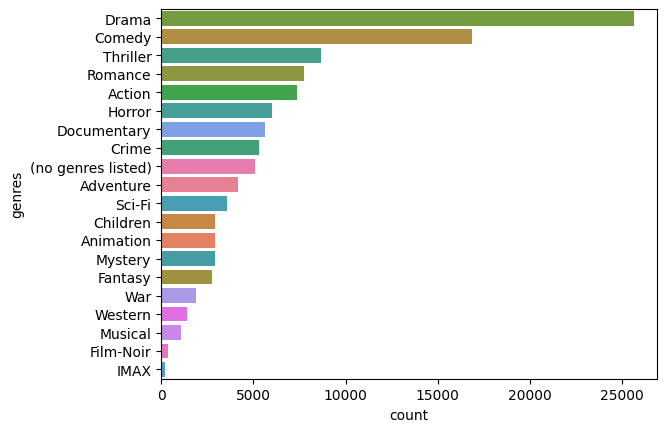

In [14]:
sns.countplot(data=movies_genre, y="genres", order=movies_genre["genres"].value_counts().index, hue="genres")

In [15]:
ratings_df["userId"].value_counts().iloc[0:]

userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
12094        20
119539       20
156759       20
12084        20
36207        20
Name: count, Length: 162541, dtype: int64

In [16]:
#Now to get the average number of reviews by user:

ratings_df["userId"].value_counts().describe()

#We encounter a high average of reviews per user, but also a big standard deviation

count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
Name: count, dtype: float64

<Axes: >

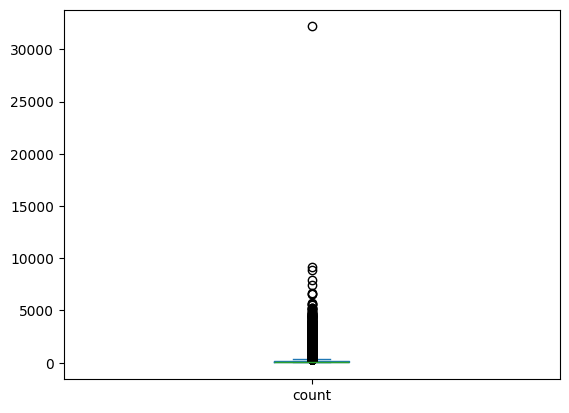

In [17]:
ratings_df["userId"].value_counts().plot.box()

Here its observed the cause for the extreme deviation, a single value blows off the chart,
and a lot of them go over 5000 while the immense majority stays under it

In [18]:
combined_genre = movies_genre.set_index("movieId").join(other=ratings_df.set_index("movieId"), on="movieId", validate="m:m", lsuffix="L", rsuffix="R")

In [19]:
print(combined_genre.shape)
combined_genre.head(3)

(67815255, 5)


,title,genres,userId,rating,timestamp
movieId,,,,,
1,Toy Story (1995),Adventure,2.0,3.5,1.141416e+09
1,Toy Story (1995),Adventure,3.0,4.0,1.439472e+09
1,Toy Story (1995),Adventure,4.0,3.0,1.573944e+09


In [20]:
combined_genre.drop(columns=["timestamp"], inplace=True)

In [27]:
combined = combined_genre.drop(columns=["genres", "title"]).drop_duplicates()

In [23]:
combined.to_csv("rate_matrix.csv", sep=",")

In [24]:
matrix_shape = []
matrix_shape.append(ratings_df.shape[0])
matrix_shape.append(movies_df.shape[0])
matrix_shape

[25000095, 62423]